#Loading dataset

In [2]:
import pandas as pd
tit =  pd.read_csv("Titanic-Dataset.csv")
#this will help to display the first few rows of the dataframe 
tit.head()#easy to understand the structure

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Cleaning

In [3]:
#I have dropped unwanted columns as they do not contribute to my prediction
tit.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)
#I am filling the 'Age' column with median
tit["Age"] = tit["Age"].fillna(tit["Age"].median())#better approach for handling missing values in numerical columns
#I am filling the 'Embarked' column with mode
tit["Embarked"] = tit["Embarked"].fillna(tit["Embarked"].mode()[0])#better approach for handling missing values in categorical columns
#I am checking if there is any missing values left after imputing
tit.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#Encoding categorical variables

In [4]:
# this helps to convert string labels into numbers(machine-readable format)
from sklearn.preprocessing import LabelEncoder
#initialize labelEncoder
l = LabelEncoder()
tit["Sex"] = l.fit_transform(tit["Sex"])#this labels female=0 and male=1
tit["Embarked"] = l.fit_transform(tit["Embarked"])#this labels C=0, Q=1, S-2

#Prepare data

In [5]:
X = tit.drop("Survived",axis=1)#mentions all the features except 'Survived' to be in input features
y = tit["Survived"]#mentions 'Survived' to be in output(target) feature

#Split for train & test

In [6]:
from sklearn.model_selection import train_test_split
#splits data into 80% for training and 20% for testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Train

In [7]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)#train a random forest model

RandomForestClassifier(random_state=42)

#Testing(Evaluating) : RandomForest

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pred = model.predict(X_test)#predict using testing data
#Display evaluation metrics
print("Accuracy:",accuracy_score(y_test,pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,pred))
print("\nClassification Report:\n",classification_report(y_test,pred))

Accuracy: 0.8212290502793296

Confusion Matrix:
 [[92 13]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



#A small overview

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
test_results = X_test.copy()
test_results["Actual"] = y_test
test_results["Predicted"] = pred

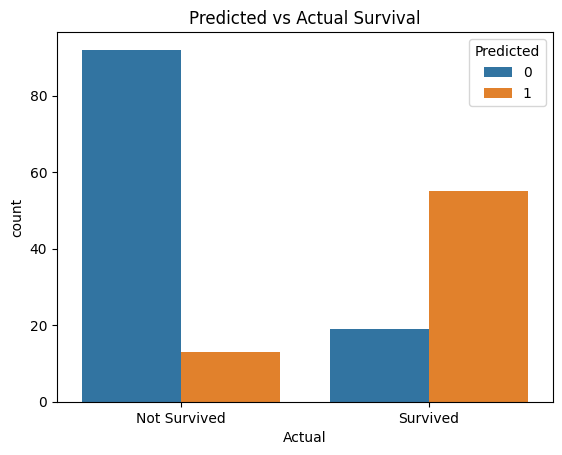

In [13]:
sns.countplot(x='Actual', hue='Predicted', data=test_results)
plt.title("Predicted vs Actual Survival")
plt.xticks([0,1],['Not Survived', 'Survived'])
plt.legend(title="Predicted")
plt.show()